In [18]:
from typing import List, Tuple, TypedDict
from langgraph.graph import StateGraph, START, END

In [19]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2:int
    finalNumber:int


In [25]:
def adder(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    "This node will select the next node of the graph"
    if state['operation'] == '+':
        return "addition_operation"
    else:
        return "subtraction_operation"

def router(state: AgentState) -> AgentState:
    "This node will route the state to the correct operation"
    return state

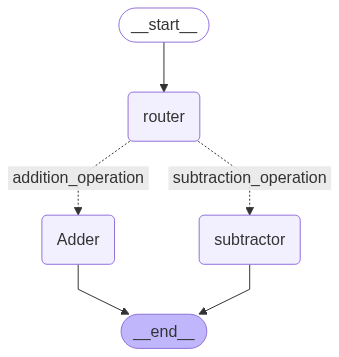

In [ ]:
graph = StateGraph(AgentState)
graph.add_node("Adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router",router)
# or graph.add_node("router",lambda state:state)

graph.add_edge(START, "router")

## Conditional edge asks for "Starting node", "going to which node", "condition"
graph.add_conditional_edges("router",decide_next_node,
                            {
                                "addition_operation": "Adder",
                                "subtraction_operation": "subtractor"
                            })
graph.add_edge("Adder", END)
graph.add_edge("subtractor", END)
app = graph.compile()

app


In [23]:
app.invoke({"number1": 10, "operation": "+", "number2": 20})  # type: ignore

{'number1': 10, 'operation': '+', 'number2': 20, 'finalNumber': 30}